In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv(r"..\notebook\data\data.csv")

In [3]:
df.head()

,Unnamed: 0,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,...,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps,fuel_slope,fuel_bias,deg_slope,deg_bias,lag_slope_mean,lag_bias_mean
0,0,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,GIO,2.0,97.066,Qualifying,...,28.0,27.0,5.554,55,-0.109321,105.89063,0.056584,100.607381,NaN,NaN
1,1,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,RAI,2.0,97.555,Qualifying,...,12.0,43.0,5.554,55,0.005000,105.23700,-0.077195,106.352228,-0.010306,103.479805
2,2,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,GIO,1.0,97.066,Qualifying,...,1.0,27.0,5.554,55,-0.109321,105.89063,-0.365247,116.706700,NaN,NaN
3,3,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,1.0,97.555,Qualifying,...,1.0,10.0,5.554,55,0.005000,105.23700,0.216800,104.273100,-0.074224,110.489900
4,4,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,2.0,97.555,Qualifying,...,11.0,1.0,5.554,55,0.005000,105.23700,-0.077195,106.352228,NaN,NaN


In [4]:
df = df.drop(["Unnamed: 0"], axis=1)

In [5]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
categorial_inputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

num_features = [features for features in df.select_dtypes(exclude="object").columns]
cat_features = [features for features in df.select_dtypes(include="object").columns]

df[num_features] = numeric_imputer.fit_transform(df[num_features])
df[cat_features] = categorial_inputer.fit_transform(df[cat_features])

In [6]:
y = df["StintLen"]
X = df.drop(columns=['StintLen'],axis=1)

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(exclude="object").columns
categorial_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
ord_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("OrdinalEncoder", ord_transformer, categorial_features),
         ("StandardScaler", numeric_transformer, numeric_features),        
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3688, 26), (923, 26))

In [10]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Support Vector Regressor": SVR()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10.8832
- Mean Absolute Error: 8.5799
- R2 Score: 0.2893
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.2095
- Mean Absolute Error: 8.8506
- R2 Score: 0.2525


Lasso
Model performance for Training set
- Root Mean Squared Error: 11.4461
- Mean Absolute Error: 8.9920
- R2 Score: 0.2139
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.5962
- Mean Absolute Error: 9.1274
- R2 Score: 0.2001


Ridge
Model performance for Training set
- Root Mean Squared Error: 10.8832
- Mean Absolute Error: 8.5798
- R2 Score: 0.2893
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.2094
- Mean Absolute Error: 8.8505
- R2 Score: 0.2525


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9.8125
- Mean Absolute Error: 7.6465
- R2 Score: 0.4223
-----------------

# Result

In [12]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.800359
7,CatBoosting Regressor,0.797480
5,Random Forest Regressor,0.789233
4,Decision Tree,0.620973
8,AdaBoost Regressor,0.419523
2,Ridge,0.252527
0,Linear Regression,0.252522
1,Lasso,0.200060
9,Support Vector Regressor,0.177360
3,K-Neighbors Regressor,0.156463


# XGBoost Regressor

In [13]:
xgboostreg = XGBRegressor()
xgboostreg = xgboostreg.fit(X_train, y_train)
y_pred = xgboostreg.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 80.04


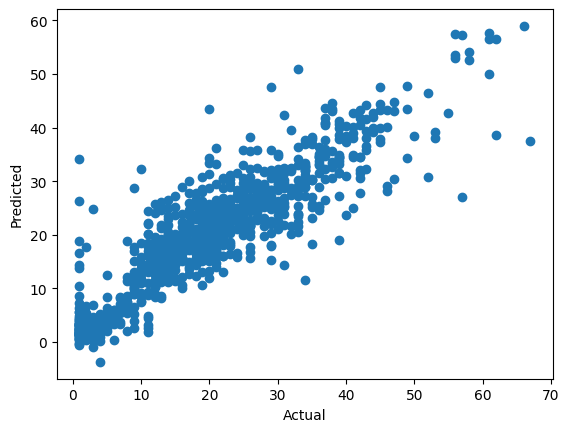

In [14]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='StintLen'>

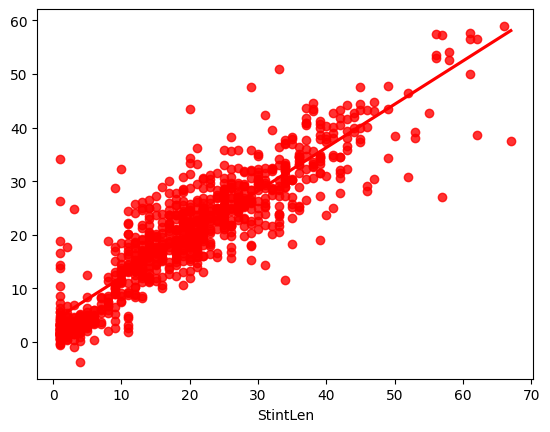

In [15]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [16]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1073,11.0,14.471822,-3.471822
2749,19.0,22.478413,-3.478413
1374,12.0,19.512915,-7.512915
4483,1.0,2.276638,-1.276638
3824,25.0,19.967163,5.032837
...,...,...,...
506,38.0,33.627293,4.372707
393,14.0,18.289797,-4.289797
2379,12.0,14.133495,-2.133495
1512,17.0,22.154795,-5.154795
